<a href="https://colab.research.google.com/github/Madeira-International-Workshop-in-ML/2022_day_5/blob/main/Notebooks/Example%201%20--%20Basic%20Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the necessary datasets

In [ ]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from google.colab import files

% matplotlib inline

In [ ]:
# The following is just to check if the GPU from COLAB can is AVAILABLE
is_gpu_available = tf.config.list_physical_devices('GPU')
print('GPU is', 'AVAILABLE' if is_gpu_available else 'NOT AVAILABLE')

GPU is AVAILABLE


# Example 1: Generate a simple model



## Create and test the model

In [ ]:
# Create some dummy data
X = np.array([1, 2, 3, 4, 5, 6])
y = np.array([3, 5, 7, 9, 11, 13])

In [ ]:
# Create the model with a single hidden unit
model = tf.keras.models.Sequential(
        [tf.keras.layers.InputLayer(input_shape=(1,)),
         tf.keras.layers.Dense(units=1)]
)

# Compile the model
model.compile(optimizer='sgd', loss='mean_squared_error')

# Check to see if the model is what we pretend
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Let's train the model
model.fit(X, y, epochs=10)

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 130.5822
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 60.4499
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 27.9904
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 12.9671
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 6.0138
Epoch 6/10
1/1 [==============================] - 0s 4ms/step - loss: 2.7955
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 1.3059
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 0.6163
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2971
Epoch 10/10
1/1 [==============================] - 0s 5ms/step - loss: 0.1493


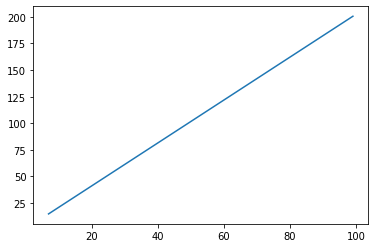

In [ ]:
# Generate some dummy test data
input_data = np.arange(7, 100, 1, dtype=np.float32)

# Use the model to predict the values
y_results = model.predict(input_data)

# Let's plot the results to see if everything is OK
plt.plot(input_data, y_results)
plt.show()

It looks like that the network was able to learn the linear relationship 👏

## Export the model

In [ ]:
# Export the SavedModel
export_dir = '/tmp/saved_model/1'
tf.saved_model.save(model, export_dir=export_dir)

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

model_path = '/tmp/model.tflite'

# Save the model
tflite_model_file = pathlib.Path(model_path)
tflite_model_file.write_bytes(tflite_model)


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: /tmp/saved_model/1/assets


896

## TensorFlow Lite Interpreter

In [ ]:
# Load the TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test the model on random input data
input_shape = input_details[0]['shape']
input_data = np.array(100 * np.random.random_sample(input_shape), dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])

print(input_data, output_data)

[[7.799185]] [[16.400816]]


## Download the model for using on Android devices

In [ ]:
files.download(model_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>